# Projet python sur l'étude de l'origine des changements de localisation

## 1. Création de la base de données
- On fusionne les bases de données et sélectionne les variables qui nous intéressent

In [2]:
import pandas as pd
import xlrd 
import matplotlib.pyplot as plt
from math import log
import seaborn as sns

In [3]:
link = "C:/Users/antoi/OneDrive - GENES/Bureau/Projet python/Donnees"

df_logement2018 = pd.read_csv(link+"/Logement/base-cc-logement-2018.csv", sep = ";", low_memory=False)

df_logement2018

,CODGEO,P18_LOG,P18_RP,P18_RSECOCC,P18_LOGVAC,P18_MAISON,P18_APPART,P18_RP_1P,P18_RP_2P,P18_RP_3P,...,P08_RP_CLIM,P08_RP_TTEGOU,P08_RP_GARL,P08_RP_VOIT1P,P08_RP_VOIT1,P08_RP_VOIT2P,P08_RP_HABFOR,P08_RP_CASE,P08_RP_MIBOIS,P08_RP_MIDUR
0,01001,353.730435,311.000000,16.278261,26.452174,345.478380,6.209388,1.025276,3.076792,21.715515,...,NaN,NaN,250.662145,276.996301,108.262639,168.733662,NaN,NaN,NaN,NaN
1,01002,174.392742,105.156379,52.945455,16.290909,174.392742,0.000000,2.082305,2.082305,14.576132,...,NaN,NaN,62.707071,76.424242,31.353535,45.070707,NaN,NaN,NaN,NaN
2,01004,7341.584896,6531.148636,118.593433,691.842827,3103.486522,4183.217092,274.687218,879.420677,1803.837447,...,NaN,NaN,3723.283382,4719.997375,2802.868189,1917.129186,NaN,NaN,NaN,NaN
3,01005,773.926652,710.392817,4.632675,58.901159,574.130278,197.204148,5.791246,47.295174,95.555556,...,NaN,NaN,496.475248,553.686262,201.693069,351.993193,NaN,NaN,NaN,NaN
4,01006,75.546970,53.963636,12.333333,9.250000,70.456061,5.090909,0.000000,3.054545,7.127273,...,NaN,NaN,43.050000,49.200000,28.700000,20.500000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34988,97420,9170.187817,8515.285162,42.587533,612.315122,7088.618164,2049.113950,110.847072,597.346965,1638.539114,...,1042.606783,3373.621823,4256.327585,5162.523336,3359.680223,1802.843113,57.503491,531.417404,235.226329,6247.445796
34989,97421,3237.422083,2591.582784,193.945735,451.893563,3128.866898,63.766969,23.283752,100.221365,411.008832,...,8.856315,39.361398,1589.232460,1429.818799,1070.630021,359.188778,15.744559,281.433994,448.719935,1526.254223
34990,97422,34895.447032,31889.864227,931.563102,2074.019702,26832.328991,7899.560037,1547.668144,3176.368863,6586.666333,...,608.432805,5481.901462,20116.784310,19354.496763,13634.263014,5720.233749,192.160478,1536.642625,1031.795266,23285.847500
34991,97423,3095.862715,2657.986587,79.262346,358.613783,2828.361799,233.230068,40.673092,167.776506,538.918474,...,144.458389,199.490156,1543.837613,1533.027801,991.554520,541.473281,18.671492,280.072387,126.769607,1858.304854


In [4]:
df_logement = df_logement2018.copy()
df_logement['DEP']=df_logement['CODGEO'].str[:2]
df = df_logement[['P18_MEN', "P13_MEN", "P08_MEN",'DEP', 'P18_PMEN', "P13_PMEN", "P08_PMEN" ]].groupby('DEP').sum()
df["VAR_MEN_13_18"]=(df["P18_MEN"]/df["P13_MEN"] -1)*100
df["VAR_MEN_08_13"]=(df["P13_MEN"]/df["P08_MEN"] -1)*100
df["VAR_PMEN_13_18"]=(df["P18_PMEN"]/df["P13_PMEN"] -1)*100
df["VAR_PMEN_08_13"]=(df["P13_PMEN"]/df["P08_PMEN"] -1)*100
df[df["VAR_PMEN_13_18"] <0]




,P18_MEN,P13_MEN,P08_MEN,P18_PMEN,P13_PMEN,P08_PMEN,VAR_MEN_13_18,VAR_MEN_08_13,VAR_PMEN_13_18,VAR_PMEN_08_13
DEP,,,,,,,,,,
02,2.312151e+05,2.284046e+05,2.211491e+05,5.226983e+05,5.293974e+05,5.270443e+05,1.230473,3.280841,-1.265417,0.446484
03,1.628538e+05,1.617693e+05,1.589618e+05,3.266070e+05,3.335231e+05,3.322816e+05,0.670413,1.766142,-2.073653,0.373615
08,1.216589e+05,1.222609e+05,1.199620e+05,2.664273e+05,2.760127e+05,2.791282e+05,-0.492319,1.916279,-3.472817,-1.116176
15,6.883367e+04,6.813916e+04,6.695348e+04,1.398721e+05,1.421160e+05,1.437296e+05,1.019251,1.770909,-1.578877,-1.122682
16,1.645517e+05,1.610385e+05,1.562809e+05,3.424979e+05,3.445522e+05,3.426848e+05,2.181589,3.044216,-0.596230,0.544938
18,1.425269e+05,1.422548e+05,1.399351e+05,2.951690e+05,3.026637e+05,3.040796e+05,0.191253,1.657712,-2.476253,-0.465648
23,5.745676e+04,5.744186e+04,5.722296e+04,1.135451e+05,1.167904e+05,1.194357e+05,0.025938,0.382538,-2.778717,-2.214868
24,1.958957e+05,1.914126e+05,1.829731e+05,4.011610e+05,4.043834e+05,3.967655e+05,2.342130,4.612382,-0.796852,1.919986
28,1.850400e+05,1.805080e+05,1.730641e+05,4.230103e+05,4.239763e+05,4.139524e+05,2.510701,4.301234,-0.227862,2.421517


In [17]:
df_PROP_MEN = df_logement[["P18_PMEN", "P18_PMEN_ANEM0002", "P18_PMEN_ANEM0204", "P18_PMEN_ANEM0509", "P18_PMEN_ANEM10P","DEP"]].groupby('DEP').sum()

df_PROP_MEN["P18_PMEN_PROP_0002"] = df_PROP_MEN["P18_PMEN_ANEM0002"]/df_PROP_MEN["P18_PMEN"]*100
df_PROP_MEN["P18_PMEN_PROP_0204"] = df_PROP_MEN["P18_PMEN_ANEM0204"]/df_PROP_MEN["P18_PMEN"]*100
df_PROP_MEN["P18_PMEN_PROP_0509"] = df_PROP_MEN["P18_PMEN_ANEM0509"]/df_PROP_MEN["P18_PMEN"]*100
df_PROP_MEN["P18_PMEN_PROP_10P"] = df_PROP_MEN["P18_PMEN_ANEM10P"]/df_PROP_MEN["P18_PMEN"]*100


df_PROP_MEN.sort_values("P18_PMEN_PROP_0002").head()
df_PROP_MEN.sort_values("P18_PMEN_PROP_0002", ascending = False).head()

,P18_PMEN,P18_PMEN_ANEM0002,P18_PMEN_ANEM0204,P18_PMEN_ANEM0509,P18_PMEN_ANEM10P,P18_PMEN_PROP_0002,P18_PMEN_PROP_0204,P18_PMEN_PROP_0509,P18_PMEN_PROP_10P
DEP,,,,,,,,,
31,1.353697e+06,203338.862444,328033.727629,262582.122338,559742.628904,15.020999,24.232428,19.397403,41.349171
34,1.134713e+06,167715.198139,271334.733272,221236.995018,474426.508723,14.780401,23.912181,19.497169,41.810249
69,2.320613e+06,326952.414165,584590.398490,472875.148206,936194.795400,14.089055,25.191209,20.377167,40.342569
66,4.661924e+05,65606.456009,102896.087002,91058.571225,206631.314564,14.072827,22.071591,19.532400,44.323181
11,3.639274e+05,49943.647362,77245.853660,69700.895384,167037.030507,13.723518,21.225620,19.152416,45.898445


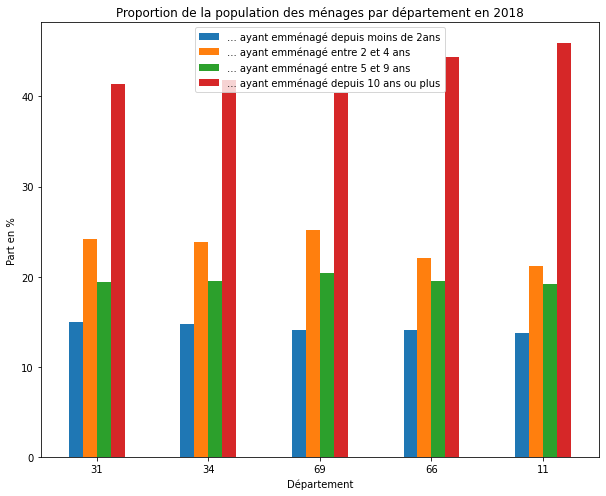

In [31]:
df_PROP_MEN_5P = df_PROP_MEN.sort_values("P18_PMEN_PROP_0002", ascending = False).head()[["P18_PMEN_PROP_0002", "P18_PMEN_PROP_0204", "P18_PMEN_PROP_0509", "P18_PMEN_PROP_10P"]] 
df_PROP_MEN_5P.columns = ["... ayant emménagé depuis moins de 2ans", "... ayant emménagé entre 2 et 4 ans", "... ayant emménagé entre 5 et 9 ans", "... ayant emménagé depuis 10 ans ou plus"]
ax  = df_PROP_MEN_5P.plot(kind = "bar")
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 8)
# Change the axes labels
ax.set_xlabel("Département")
ax.set_ylabel("Part en %")
plt.xticks(rotation = 'horizontal')
plt.title("Proportion de la population des ménages par département en 2018")
plt.show()


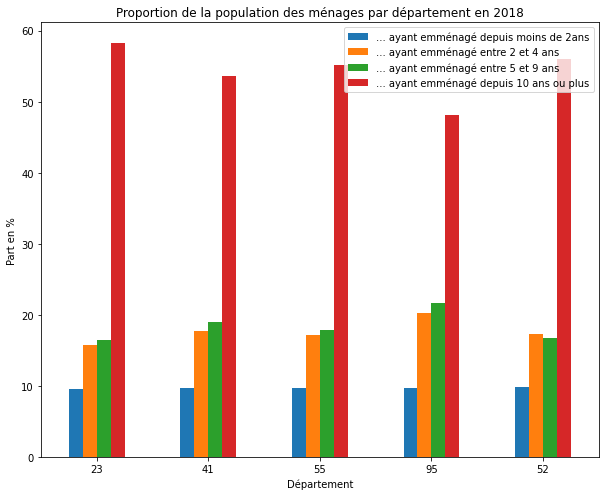

In [32]:
df_PROP_MEN_5D = df_PROP_MEN.sort_values("P18_PMEN_PROP_0002").head()[["P18_PMEN_PROP_0002", "P18_PMEN_PROP_0204", "P18_PMEN_PROP_0509", "P18_PMEN_PROP_10P"]] 
df_PROP_MEN_5D.columns = ["... ayant emménagé depuis moins de 2ans", "... ayant emménagé entre 2 et 4 ans", "... ayant emménagé entre 5 et 9 ans", "... ayant emménagé depuis 10 ans ou plus"]
ax  = df_PROP_MEN_5D.plot(kind = "bar")
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 8)
# Change the axes labels
ax.set_xlabel("Département")
ax.set_ylabel("Part en %")
plt.xticks(rotation = 'horizontal')
plt.title("Proportion de la population des ménages par département en 2018")
plt.show()

,... ayant emménagé depuis moins de 2ans,... ayant emménagé entre 2 et 4 ans,... ayant emménagé entre 5 et 9 ans,... ayant emménagé depuis 10 ou plus
DEP,,,,
31,15.020999,24.232428,19.397403,41.349171
34,14.780401,23.912181,19.497169,41.810249
69,14.089055,25.191209,20.377167,40.342569
66,14.072827,22.071591,19.532400,44.323181
11,13.723518,21.225620,19.152416,45.898445


A priori les département 31, 34, 69, 66 et 11 ont le plus attiré de ménages ces deux dernières années

In [ ]:
# Visualisation avec des diagrammes circulaires


In [21]:
data1 = df_PROP_MEN[df_PROP_MEN.index=="31"]
data1

,P18_PMEN,P18_PMEN_ANEM0002,P18_PMEN_ANEM0204,P18_PMEN_ANEM0509,P18_PMEN_ANEM10P,P18_PMEN_PROP_0002,P18_PMEN_PROP_0204,P18_PMEN_PROP_0509,P18_PMEN_PROP_10P
DEP,,,,,,,,,
31,1.353697e+06,203338.862444,328033.727629,262582.122338,559742.628904,15.020999,24.232428,19.397403,41.349171


In [15]:
#Visualisation avec carte 

from pyensae.datasource import download_data
try:
    download_data("GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01.7z",
                  website="https://wxs-telechargement.ign.fr/oikr5jryiph0iwhw36053ptm/telechargement/inspire/" + \
                          "GEOFLA_THEME-DEPARTEMENTS_2015_2$GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01/file/")
except Exception as e:
    # au cas le site n'est pas accessible
    download_data("GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01.7z", website="xd")
    


In [17]:
from pyquickhelper.filehelper import un7zip_files
try:
    un7zip_files("GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01.7z", where_to="shapefiles")
    departements = 'shapefiles/GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01/GEOFLA/1_DONNEES_LIVRAISON_2015/' + \
                   'GEOFLA_2-1_SHP_LAMB93_FR-ED152/DEPARTEMENT/DEPARTEMENT.shp'
except FileNotFoundError as e:
    # Il est possible que cette instruction ne fonctionne pas.
    # Dans ce cas, on prendra une copie de ce fichier.
    import warnings
    warnings.warn("Plan B parce que " + str(e))
    download_data("DEPARTEMENT.zip")
    departements = "DEPARTEMENT.shp"

if not os.path.exists(departements):
    raise FileNotFoundError("Impossible de trouver '{0}'\ncurrent folder: '{1}'".format(
        departements, os.getcwd()))

ModuleNotFoundError: No module named 'py7zlib'

# Enquête mobilité résidentielle INSEE
On peut s'intéresser aux données non de logement mais directement de l'enquête de mobilité résidentielle.


In [11]:
df_mob_res = pd.read_csv("C:/Users/antoi/OneDrive - GENES/Bureau/Projet python/Donnees/RP2018_migcom_csv/FD_MIGCOM_2018.csv", sep =";")
df_mob_res

MemoryError: Unable to allocate 128. KiB for an array with shape (16384,) and data type int64